In [1]:
import pandas as pd
import numpy as np


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the already scaled dataset
dataset = pd.read_csv('roughness_dataset_scaled.csv')

# Shuffle the dataset (already scaled)
dataset_shuffled = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# # Split into features (X) and labels (y)
# X = dataset_shuffled.iloc[:, :-1]  # Features (all columns except the last)
# y = dataset_shuffled.iloc[:, -1]   # Labels (last column)
#
# # Split into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Check the shapes
# print(f"Training set size: {X_train.shape[0]} samples")
# print(f"Testing set size: {X_test.shape[0]} samples")


In [4]:
dataset_shuffled

,Edge Density,Fractal Dimension,GLCM Contrast,LBP Uniformity,Label
0,-0.308342,0.382504,-0.355274,-0.605453,0
1,-0.243696,-0.249203,-0.259232,-0.696096,0
2,-0.341912,-0.200610,-0.372058,-0.021270,1
3,-0.326061,-0.249203,-0.282809,-0.317624,0
4,-0.301881,-0.249203,-0.139300,1.855838,1
...,...,...,...,...,...
814,-0.341912,-0.011098,-0.376391,-0.505323,0
815,-0.341912,-0.249203,-0.378051,0.067561,0
816,2.294467,-0.249203,0.997082,-0.830970,0
817,2.077030,-0.249203,0.942561,-0.824483,0


Matplotlib is building the font cache; this may take a moment.


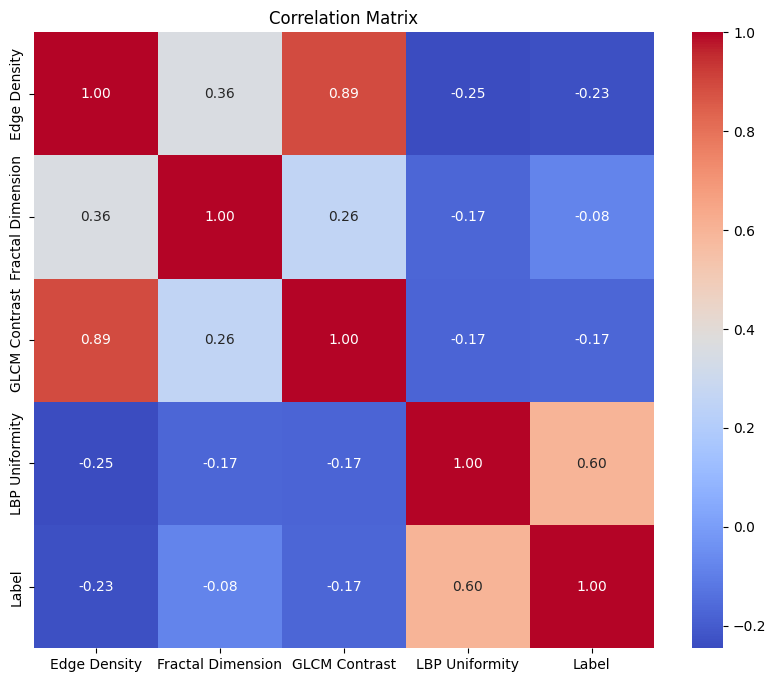

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlation matrix
corr_matrix = dataset_shuffled.corr()
print(corr_matrix)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
print(corr_matrix)

                   Edge Density  Fractal Dimension  GLCM Contrast  \
Edge Density           1.000000           0.358057       0.892266   
Fractal Dimension      0.358057           1.000000       0.259791   
GLCM Contrast          0.892266           0.259791       1.000000   
LBP Uniformity        -0.245612          -0.170241      -0.174753   
Label                 -0.233050          -0.084150      -0.170911   

                   LBP Uniformity     Label  
Edge Density            -0.245612 -0.233050  
Fractal Dimension       -0.170241 -0.084150  
GLCM Contrast           -0.174753 -0.170911  
LBP Uniformity           1.000000  0.600124  
Label                    0.600124  1.000000  


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the scaled dataset
dataset = pd.read_csv('roughness_dataset_scaled.csv')

# Invert the Edge Density feature (1 - Edge Density)
dataset['Edge Density'] = 1 - dataset['Edge Density']

# Define features (with the adjusted Edge Density)
X = dataset[['Edge Density', 'Fractal Dimension', 'GLCM Contrast', 'LBP Uniformity']]
y = dataset['Label']  # Smoothness label (0 = rough, 1 = smooth)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 0.11439634146341462
R²: 0.5243036487322201


In [14]:
y_pred

array([0.12, 0.  , 0.17, 0.32, 1.  , 1.  , 0.43, 0.89, 0.28, 0.86, 0.  ,
       0.5 , 0.24, 0.15, 1.  , 0.07, 0.04, 0.88, 1.  , 1.  , 0.4 , 0.72,
       0.03, 0.22, 0.04, 1.  , 1.  , 0.77, 0.32, 0.02, 0.  , 1.  , 0.29,
       0.14, 0.26, 0.49, 0.1 , 0.53, 1.  , 0.1 , 0.08, 0.7 , 0.  , 0.43,
       0.52, 0.  , 0.05, 0.05, 0.6 , 0.03, 0.53, 1.  , 0.61, 1.  , 0.66,
       0.31, 0.1 , 0.74, 0.05, 1.  , 0.57, 0.68, 0.34, 0.25, 0.21, 0.  ,
       0.1 , 0.72, 0.  , 0.9 , 0.97, 0.44, 0.99, 0.05, 0.61, 0.04, 0.06,
       0.15, 0.23, 0.16, 0.18, 0.07, 0.1 , 0.81, 1.  , 0.  , 0.  , 1.  ,
       0.01, 0.17, 0.  , 0.  , 0.98, 0.1 , 0.96, 0.6 , 0.04, 0.  , 0.01,
       0.4 , 0.22, 0.01, 0.26, 1.  , 0.5 , 0.77, 0.12, 0.05, 0.29, 0.09,
       0.79, 0.12, 0.93, 0.95, 0.98, 0.15, 0.76, 0.11, 0.07, 0.57, 0.2 ,
       0.53, 0.15, 0.44, 0.06, 0.45, 0.2 , 0.08, 1.  , 0.  , 0.65, 0.59,
       0.92, 0.57, 0.44, 0.34, 0.25, 0.  , 0.18, 0.99, 0.13, 0.27, 0.08,
       0.  , 0.09, 0.68, 0.78, 0.1 , 0.58, 0.  , 0.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the scaled dataset
dataset = pd.read_csv('wall_roughness_dataset.csv')

# Invert the Edge Density feature (1 - Edge Density)
# dataset['Edge Density'] = 1 - dataset['Edge Density']

# Define features (with the adjusted Edge Density)
X = dataset[[
        'Edge Density',
        'Fractal Dimension',
        'Contour Count',
        'Avg Contour Area',
        'GLCM Contrast',
        'GLCM Homogeneity',
        'LBP Uniformity',
        'Gradient Skewness'
]]
y = dataset['Label']  # Smoothness label (0 = rough, 1 = smooth)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 0.09377804878048782
R²: 0.6100410636982065


In [28]:
y_pred

array([0.89, 0.96, 0.82, 1.  , 0.  , 0.  , 0.08, 0.  , 1.  , 0.05, 1.  ,
       0.71, 0.97, 0.87, 0.02, 0.99, 0.99, 0.05, 0.  , 0.  , 0.4 , 0.8 ,
       0.86, 0.98, 0.95, 0.  , 0.  , 0.76, 0.76, 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.85, 0.08, 1.  , 0.92, 0.  , 0.96, 0.91, 0.34, 0.99, 0.06,
       0.01, 1.  , 0.93, 0.98, 0.72, 0.95, 0.98, 0.  , 0.06, 0.21, 0.56,
       0.33, 0.95, 0.21, 0.61, 0.02, 0.41, 0.06, 0.32, 0.53, 0.88, 1.  ,
       0.79, 0.44, 1.  , 0.34, 0.  , 0.18, 0.  , 0.99, 0.47, 0.72, 0.9 ,
       0.96, 0.69, 0.63, 0.96, 0.98, 0.89, 0.2 , 0.1 , 0.96, 0.95, 0.  ,
       1.  , 0.75, 0.95, 0.99, 0.  , 0.85, 0.  , 0.26, 0.94, 0.98, 0.98,
       0.71, 0.4 , 0.94, 0.29, 0.  , 0.88, 0.4 , 0.97, 0.71, 0.87, 0.95,
       0.07, 0.98, 0.02, 0.  , 0.22, 1.  , 0.18, 0.92, 1.  , 0.49, 0.87,
       0.83, 0.92, 0.99, 0.97, 0.84, 0.25, 0.75, 0.  , 1.  , 0.08, 0.27,
       0.2 , 0.65, 0.19, 0.89, 1.  , 0.59, 1.  , 0.03, 1.  , 0.83, 1.  ,
       1.  , 0.81, 0.09, 0.12, 0.74, 0.66, 1.  , 0.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the scaled dataset
dataset = pd.read_csv('wall_roughness_dataset.csv')


# Define features (with the adjusted Edge Density)
X = dataset[[
        'Edge Density',
        'Fractal Dimension',
        'Contour Count',
        'Avg Contour Area',
        'GLCM Contrast',
        'GLCM Homogeneity',
        'LBP Uniformity',
        'Gradient Skewness'
]]
y = dataset['Label']  # Smoothness label (0 = rough, 1 = smooth)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,
                         random_state=42,
                         learning_rate=0.1,
                         max_depth=6,
                         colsample_bytree=0.8,
                         subsample=0.8)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)  # RMSE (root of MSE)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 0.09563916176557541
R²: 0.6023019552230835


In [22]:
import xgboost as xgb
print(xgb.__version__)



2.1.3


In [2]:
from ultralytics import YOLO
yolo = YOLO('best.pt')

/Users/amananand/pycharmprojects/wall Inspection/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
yolo('/Users/amananand/pycharmprojects/wall Inspection/fyp robot.v3i.yolov8/test/images/20240122_101903_jpg.rf.99aad4258d124925de88669fcceadeca.jpg',show=True)


image 1/1 /Users/amananand/pycharmprojects/wall Inspection/fyp robot.v3i.yolov8/test/images/20240122_101903_jpg.rf.99aad4258d124925de88669fcceadeca.jpg: 640x640 1 Rough Wall, 108.9ms
Speed: 3.0ms preprocess, 108.9ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Rough Wall', 1: 'Smooth Wall'}
 obb: None
 orig_img: array([[[ 95, 117, 128],
         [ 94, 116, 127],
         [ 95, 115, 126],
         ...,
         [106, 126, 137],
         [104, 124, 135],
         [102, 122, 133]],
 
        [[ 92, 114, 125],
         [ 92, 114, 125],
         [ 93, 113, 124],
         ...,
         [104, 124, 135],
         [103, 123, 134],
         [102, 122, 133]],
 
        [[ 94, 114, 125],
         [ 94, 114, 125],
         [ 94, 114, 125],
         ...,
         [108, 128, 139],
         [108, 128, 139],
         [109, 129, 140]],
 
        ...,
 
        [[ 81,  97, 113],
         [ 81,  97, 113],
         [ 84,  99, 115],
         ...,
         [115, 127, 139],
         [114, 126, 138],
         [114, 126, 138]],
 
        [[ 85, 101, 117],
         [ 85, 101, 117],
         [ 86, 101, 117],
         .